Attempt to compare C-T transitions in tumor / normal pair

```
cp ~/s3/herv/from_genepi/TCGA_Glioma_HERV52/TCGA-41-5651-* ./

samtools fastq -N -1 TCGA-41-5651-01A.1.fastq.gz -2 TCGA-41-5651-01A.2.fastq.gz TCGA-41-5651-01A.bam 
\rm TCGA-41-5651-01A.bam

bowtie2 --threads 4 -x hg38 --very-sensitive-local -1 TCGA-41-5651-01A.1.fastq.gz -2 TCGA-41-5651-01A.2.fastq.gz -S TCGA-41-5651-01A.sam
samtools sort --threads 3 -o TCGA-41-5651-01A.bam TCGA-41-5651-01A.sam
\rm TCGA-41-5651-01A.sam
chmod -w TCGA-41-5651-01A.bam
samtools index TCGA-41-5651-01A.bam
chmod -w TCGA-41-5651-01A.bam.bai
bcftools mpileup -Ou -f ~/s3/herv/indexes/hg38.fa TCGA-41-5651-01A.bam | bcftools call -mvO z -o TCGA-41-5651-01A.vcf.gz
chmod -w TCGA-41-5651-01A.vcf.gz

zcat TCGA-41-5651-01A.vcf.gz | awk -F"\t" '( !/^#/ && $4 == "C" && $5 == "T"){print $1"\t"$2}' > TCGA-41-5651-01A.CT.txt



samtools fastq -N -1 TCGA-41-5651-10A.1.fastq.gz -2 TCGA-41-5651-10A.2.fastq.gz TCGA-41-5651-10A.bam 
\rm TCGA-41-5651-10A.bam
bowtie2 --threads 4 -x hg38 --very-sensitive-local -1 TCGA-41-5651-10A.1.fastq.gz -2 TCGA-41-5651-10A.2.fastq.gz -S TCGA-41-5651-10A.sam
samtools sort --threads 3 -o TCGA-41-5651-10A.bam TCGA-41-5651-10A.sam
\rm TCGA-41-5651-10A.sam
chmod -w TCGA-41-5651-10A.bam
samtools index TCGA-41-5651-10A.bam
chmod -w TCGA-41-5651-10A.bam.bai
bcftools mpileup -Ou -f ~/s3/herv/indexes/hg38.fa TCGA-41-5651-10A.bam | bcftools call -mvO z -o TCGA-41-5651-10A.vcf.gz
chmod -w TCGA-41-5651-10A.vcf.gz


zcat TCGA-41-5651-10A.vcf.gz | awk -F"\t" '( !/^#/ && $4 == "C" && $5 == "T"){print $1"\t"$2}' > TCGA-41-5651-10A.CT.txt
```

In [1]:
!head data/TCGA-41-5651-01A.CT.txt

chr1	1277206
chr1	1277211
chr1	1277213
chr1	1277218
chr1	1277723
chr1	1277748
chr1	1277755
chr1	1277785
chr1	1277792
chr1	1277817


Easier to read in with pandas rather than numpy

The last 2 numbers, followed by a letter designate sample type.

https://wiki.nci.nih.gov/display/TCGA/TCGA+barcode

Tumor types range from 01 - 09, normal types from 10 - 19 and control samples from 20 - 29. See Code Tables Report for a complete list of sample codes

So 01 is tumor and 10 is normal

In [2]:
import pandas
tumor = pandas.read_csv('data/TCGA-41-5651-01A.CT.txt', delimiter="\t", header=None, names=['chr','position'])
normal = pandas.read_csv('data/TCGA-41-5651-10A.CT.txt', delimiter="\t", header=None, names=['chr','position'])

In [3]:
tumor.head()

,chr,position
0,chr1,1277206
1,chr1,1277211
2,chr1,1277213
3,chr1,1277218
4,chr1,1277723


In [4]:
len(tumor)

13938

In [5]:
len(normal)

17732

In [6]:
tumor.loc[tumor['chr'] == 'chrX'][:10]

,chr,position
13089,chrX,2792799
13090,chrX,2796236
13091,chrX,2837884
13092,chrX,3012101
13093,chrX,3012116
13094,chrX,3140261
13095,chrX,3144588
13096,chrX,3272108
13097,chrX,3535430
13098,chrX,3535467


In [7]:
chromosomes=set(list(tumor['chr']) + list(normal['chr']))
chromosomes

{'chr1',
 'chr10',
 'chr11',
 'chr11_KI270829v1_alt',
 'chr12',
 'chr12_GL383550v2_alt',
 'chr13',
 'chr14',
 'chr14_GL000009v2_random',
 'chr14_GL000194v1_random',
 'chr14_GL000225v1_random',
 'chr14_KI270722v1_random',
 'chr15',
 'chr16',
 'chr16_GL383557v1_alt',
 'chr16_KI270728v1_random',
 'chr16_KI270853v1_alt',
 'chr17',
 'chr17_GL000205v2_random',
 'chr17_GL000258v2_alt',
 'chr17_KI270857v1_alt',
 'chr17_KI270862v1_alt',
 'chr17_KI270908v1_alt',
 'chr17_KI270909v1_alt',
 'chr18',
 'chr19',
 'chr19_GL949746v1_alt',
 'chr19_GL949747v2_alt',
 'chr19_GL949748v2_alt',
 'chr19_GL949749v2_alt',
 'chr19_GL949753v2_alt',
 'chr19_KI270866v1_alt',
 'chr1_GL383518v1_alt',
 'chr1_KI270707v1_random',
 'chr1_KI270708v1_random',
 'chr1_KI270763v1_alt',
 'chr1_KI270766v1_alt',
 'chr2',
 'chr20',
 'chr21',
 'chr21_GL383581v2_alt',
 'chr21_KI270873v1_alt',
 'chr22',
 'chr22_KI270733v1_random',
 'chr22_KI270734v1_random',
 'chr2_KI270894v1_alt',
 'chr3',
 'chr4',
 'chr4_KI270787v1_alt',
 'chr4_KI27

In [8]:
#for c in chromosomes: print(c)
len(chromosomes)

70

In [9]:
for c in sorted(chromosomes):
    print(c, len(tumor.loc[tumor['chr']==c]['position']),len(normal.loc[normal['chr']==c]['position']))

chr1 1109 1437
chr10 546 878
chr11 621 771
chr11_KI270829v1_alt 1 0
chr12 744 959
chr12_GL383550v2_alt 1 0
chr13 410 494
chr14 444 539
chr14_GL000009v2_random 0 1
chr14_GL000194v1_random 2 1
chr14_GL000225v1_random 2 1
chr14_KI270722v1_random 5 2
chr15 316 525
chr16 430 612
chr16_GL383557v1_alt 4 1
chr16_KI270728v1_random 2 2
chr16_KI270853v1_alt 0 2
chr17 387 590
chr17_GL000205v2_random 4 4
chr17_GL000258v2_alt 0 2
chr17_KI270857v1_alt 1 2
chr17_KI270862v1_alt 0 1
chr17_KI270908v1_alt 0 1
chr17_KI270909v1_alt 1 1
chr18 357 439
chr19 616 834
chr19_GL949746v1_alt 3 1
chr19_GL949747v2_alt 1 0
chr19_GL949748v2_alt 0 1
chr19_GL949749v2_alt 0 2
chr19_GL949753v2_alt 0 1
chr19_KI270866v1_alt 0 4
chr1_GL383518v1_alt 2 0
chr1_KI270707v1_random 1 0
chr1_KI270708v1_random 1 4
chr1_KI270763v1_alt 1 0
chr1_KI270766v1_alt 1 0
chr2 1019 1212
chr20 344 427
chr21 205 245
chr21_GL383581v2_alt 0 1
chr21_KI270873v1_alt 0 1
chr22 174 262
chr22_KI270733v1_random 10 10
chr22_KI270734v1_random 0 1
chr2_KI2708

In [10]:
import numpy as np
import matplotlib.pyplot as plt

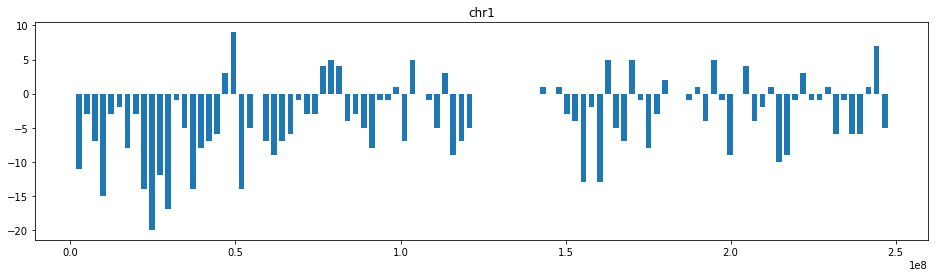

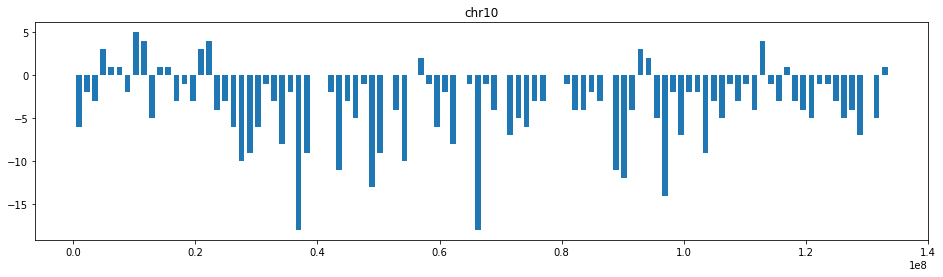

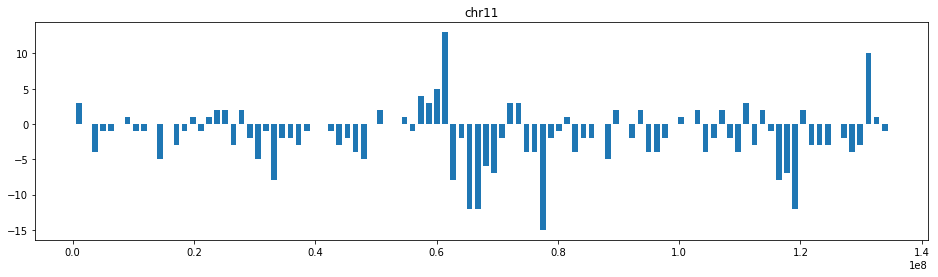

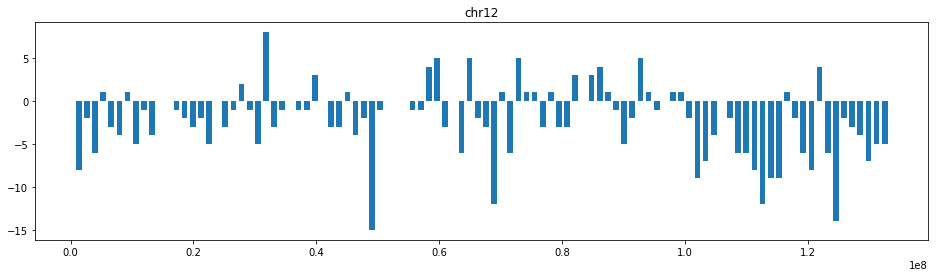

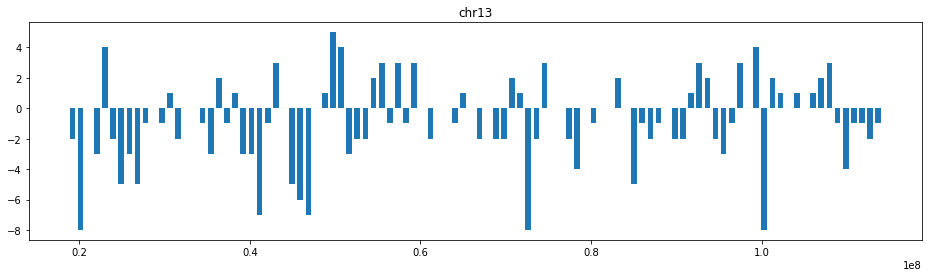

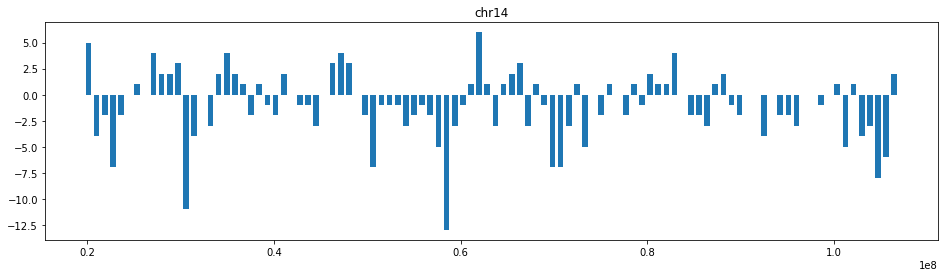

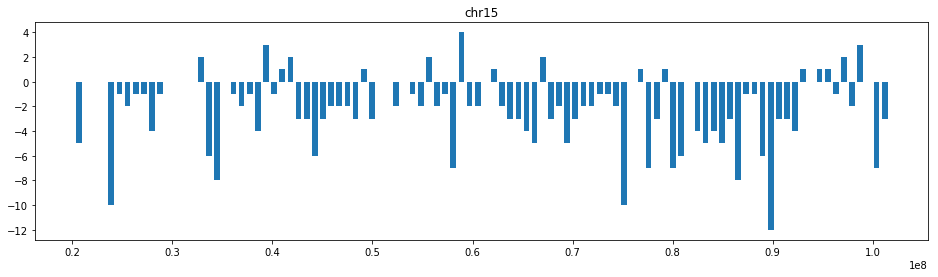

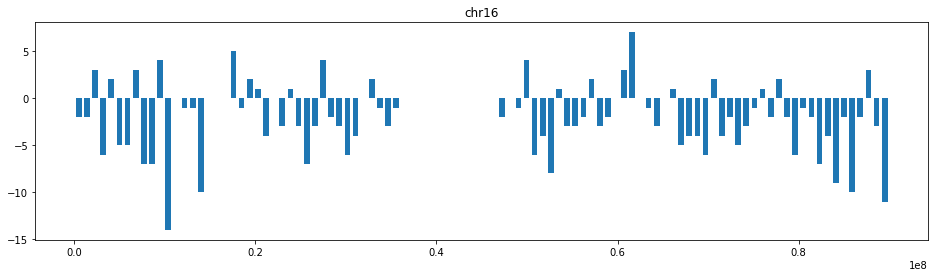

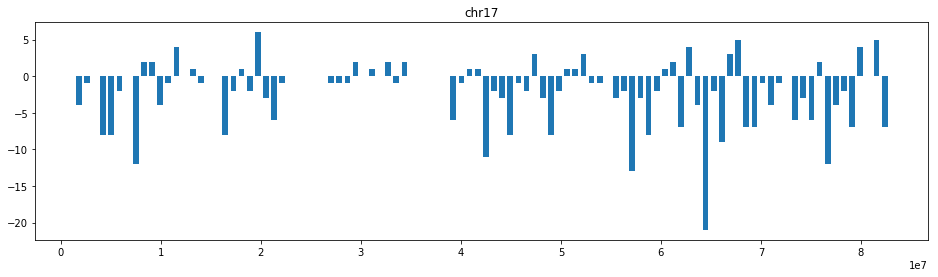

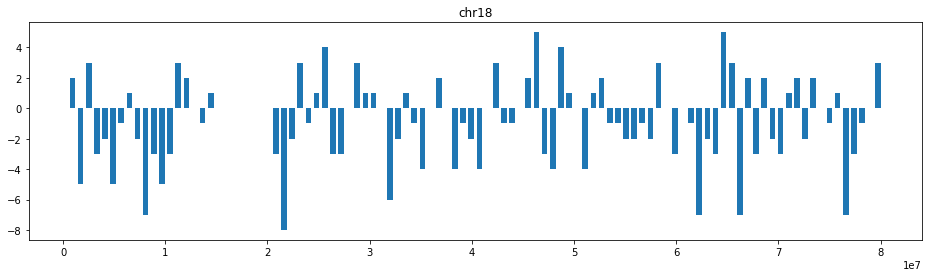

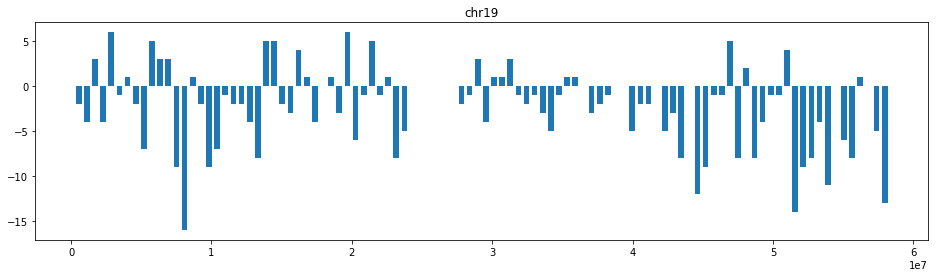

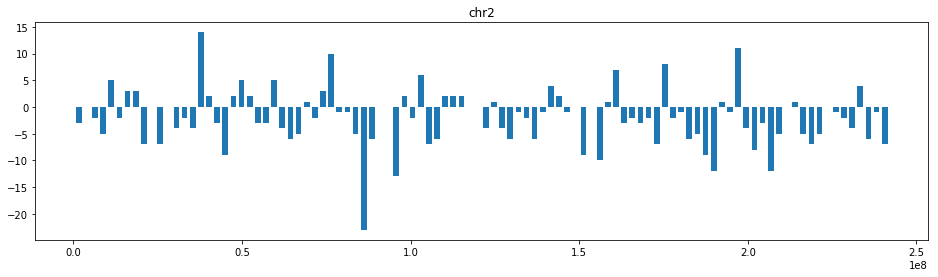

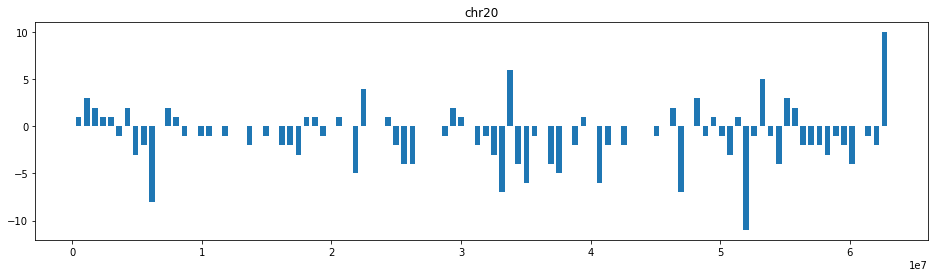

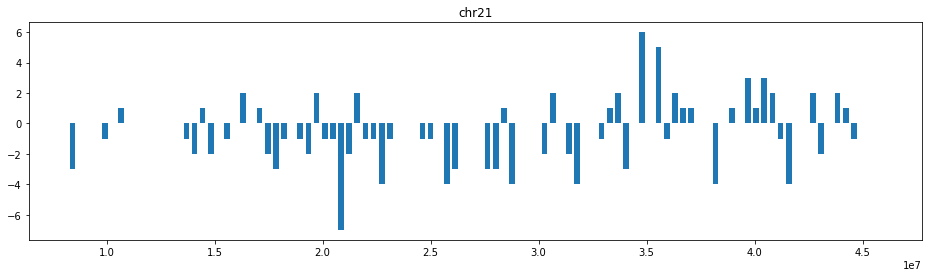

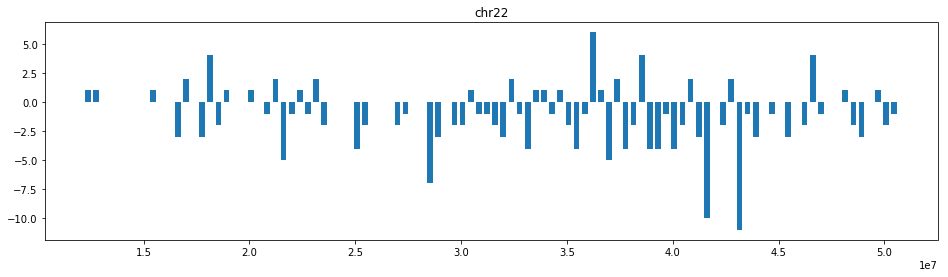

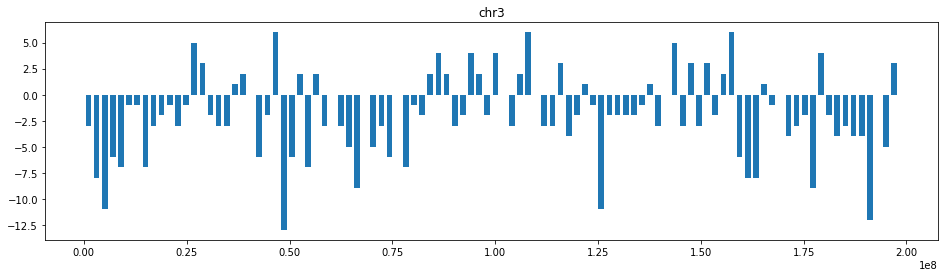

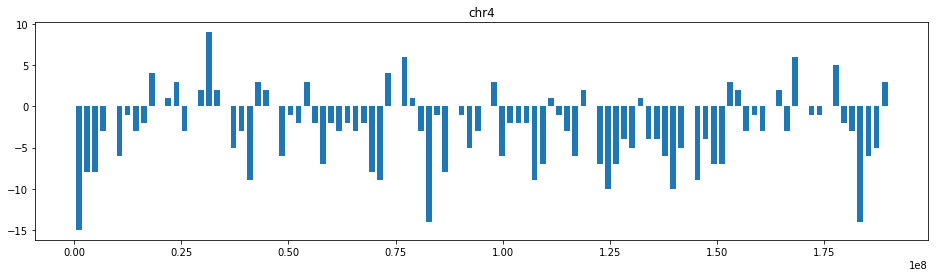

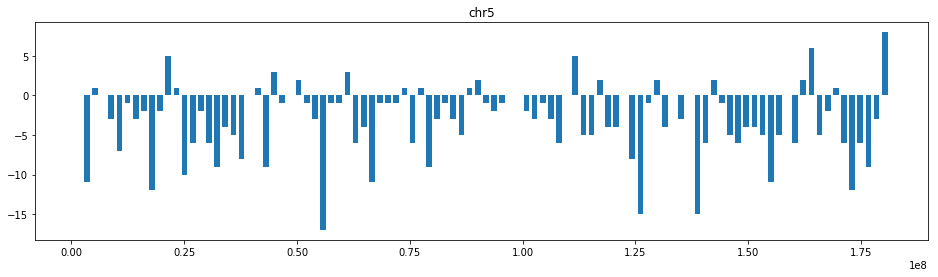

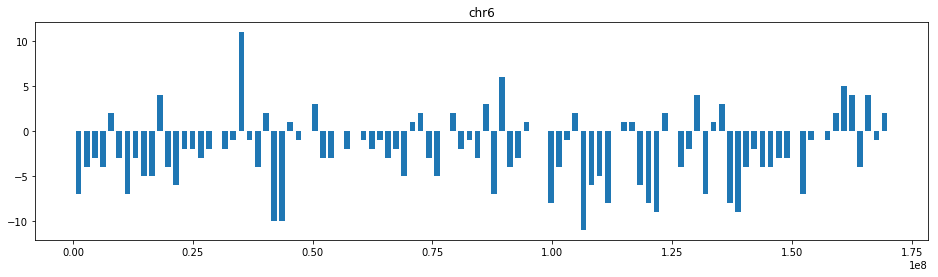

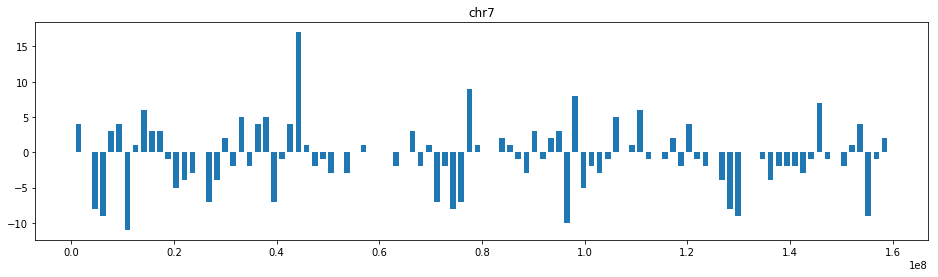

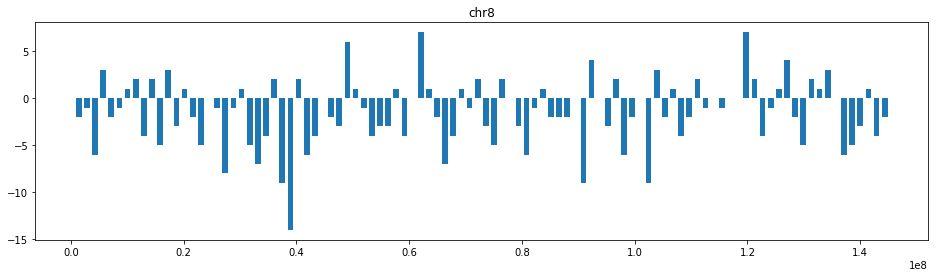

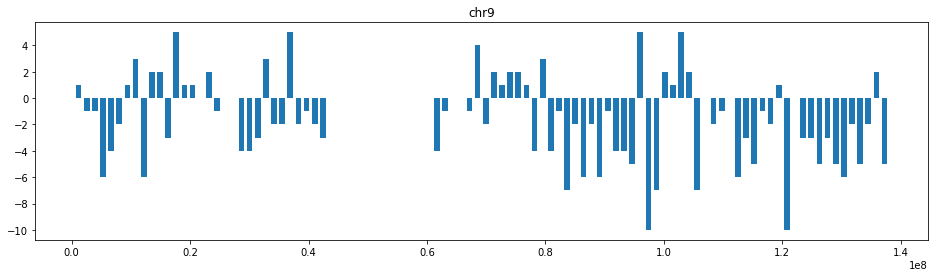

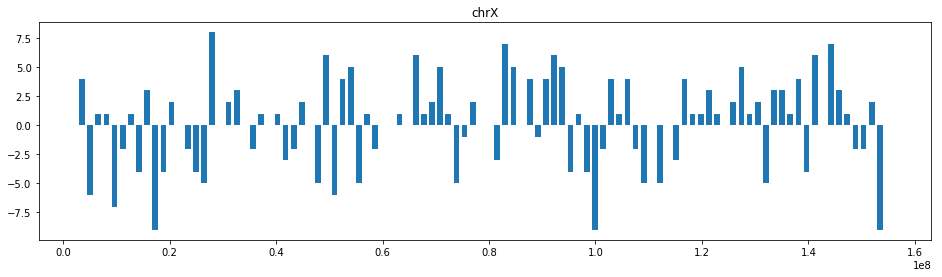

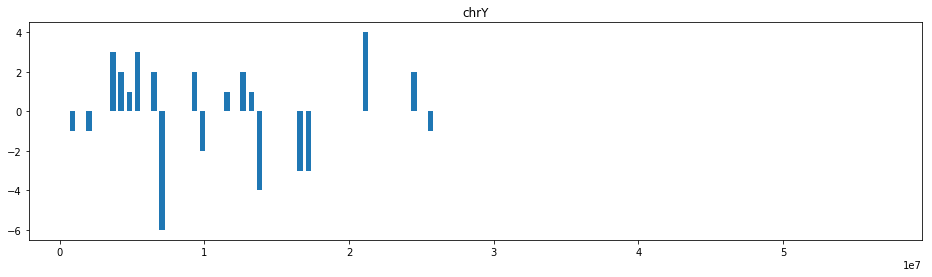

In [11]:
plt.rcParams["figure.figsize"] = [16.0,4.0]
for c in sorted(chromosomes):
    total_length=len(tumor.loc[tumor['chr']==c]['position'])+len(normal.loc[normal['chr']==c]['position'])
    if( total_length > 50 ):
        tumor_array=np.array(tumor.loc[tumor['chr']==c]['position'])
        normal_array=np.array(normal.loc[normal['chr']==c]['position'])
        min=np.array(tumor_array.min(), normal_array.min()).min()
        max=np.array(tumor_array.max(), normal_array.max()).max()
        tumor_hist, tumor_bin_edges = np.histogram(tumor_array, bins=100, range=(min,max))
        normal_hist, normal_bin_edges = np.histogram(normal_array, bins=100, range=(min,max))
        hist = tumor_hist - normal_hist
        width = 0.7 * (tumor_bin_edges[1] - tumor_bin_edges[0])
        center = (tumor_bin_edges[:-1] + tumor_bin_edges[1:]) / 2
        plt.title(c)
        plt.bar(center, hist, align='center', width=width)
        plt.show()